<table align = "center" width = 100%>
   <tr>
       </td>
           </td>
       </td>
       <td>
          <div align = "center">
               <font color = "#21618C" size = 8px>
                          <b>Data Analytics on Nvidia Valuation Dataset.</b>
               </font>
          </div>
        </td>
    <tr>
</table>

**Problem Statement: How can exploratory data analysis (EDA) be applied to historical financial, operational, and market sentiment datasets to uncover key patterns, trends, and correlations driving Nvidia's market valuation surge to $3.92 trillion, and what insights can be derived to understand the impact of AI chip demand and competitive dynamics in the semiconductor industry?**

### Importing Necessary Libraries

In [1]:
# pandas library for accessing data structures which helps in loading and handling the dataset.
import pandas as pd

# Numpy library to perform certain mathematical operations and accessing numpy array
import numpy as np

# Matplotlib library for plotting graphs for analysis and visualization of the data
import matplotlib.pyplot as plt

# Seaborn library for plotting more dynamic and visually appealing graphs
import seaborn as sns

# To run Chi-square test
import scipy.stats as stats

# To access 'filterwarnings' function to ignore the warnings
import warnings

# Step-1: Data Overview

In [2]:
# loading the dataset
df_Nvidia_Valuation_data = pd.read_csv("nvidia_valuation_data.csv")

# This method is for ignoring the warnings
warnings.filterwarnings('ignore')

In [3]:
# Checking columns and rows of the dataset
No_of_rows, No_of_columns = df_Nvidia_Valuation_data.shape

#Printing number of columns
print("Number of Columns:",No_of_columns)

#Printing number of rows
print("Number of Rows:",No_of_rows)

Number of Columns: 30
Number of Rows: 101801


In [4]:
# Setting max columns option, so that it will be able to display all the columns of the dataset
pd.set_option("display.max_columns", None)

# Setting max rows option, so that it will be able to display all the rows of the dataset
pd.set_option("display.max_rows", None)

In [5]:
# Printing first few values of the dataset to check the type of values and columns in the dataset
df_Nvidia_Valuation_data.head()

,Date,Stock_Price_USD,Market_Cap_Trillion_USD,Trading_Volume_Million_Shares,Revenue_Billion_USD,R_and_D_Spending_Billion_USD,Sentiment_Score,AI_Chip_Announcement,Competitor_Stock_Price_USD,EPS_USD,P_E_Ratio,Analyst_Rating,Chip_Production_Units_Million,Data_Center_Contracts,Patent_Filings,Social_Media_Volume,News_Sentiment_Score,Competitor_Market_Cap_Billion_USD,Global_AI_Investment_Billion_USD,Semiconductor_Index,Supply_Chain_Delay_Days,Cloud_Provider_Revenue_Billion_USD,AI_Adoption_Rate_Percent,Tech_Sector_Sentiment,Interest_Rate_Percent,Market_Volatility_Index,Nvidia_News_Volume,Regulatory_Impact_Score,Chip_Sales_Growth_Percent,Energy_Cost_USD_per_kWh
0,2023-02-17,171.430573,3.997871,100.40,NaN,NaN,0.05,False,69.65,NaN,NaN,1.92,NaN,NaN,NaN,7399.0,0.51,149.80,NaN,4925.06,NaN,NaN,NaN,-0.04,5.00,26.97,113.0,0.09,NaN,NaN
1,2025-07-01,145.399903,3.919487,115.19,NaN,NaN,0.37,False,78.16,NaN,63.94,2.66,NaN,NaN,NaN,8167.0,0.17,173.06,NaN,4360.33,NaN,NaN,NaN,-0.35,4.25,29.76,159.0,-0.21,NaN,NaN
2,2023-05-22,165.353122,3.941235,NaN,NaN,NaN,0.19,False,55.01,NaN,74.10,1.63,NaN,NaN,NaN,4638.0,-0.21,194.62,NaN,4485.01,NaN,NaN,NaN,0.08,4.00,NaN,105.0,-0.15,NaN,NaN
3,2024-12-10,NaN,3.761298,113.89,NaN,NaN,0.13,False,68.29,NaN,70.34,1.18,NaN,NaN,NaN,NaN,NaN,138.47,NaN,4249.28,NaN,NaN,NaN,0.23,4.50,32.72,36.0,-0.16,NaN,NaN
4,2024-11-29,156.655398,3.866843,61.65,NaN,NaN,NaN,False,64.16,NaN,73.38,1.93,NaN,NaN,NaN,2709.0,-0.40,126.56,NaN,4574.10,NaN,NaN,NaN,0.04,4.00,26.93,NaN,-0.19,NaN,NaN


## **About the dataset (Nvidia Valuation and AI Chip Industry Dataset)**  
The dataset contains 018011 observations about Nvidia’s financial performance, operational metrics, market sentiment, competitive dynamics, and macroeconomic factors from January 1, 2023, to July 6, 2025. There are multiple columns about which information is given below.

#### Data Dictionary  
- **`Date`**: This column simply tells us the **date of the observation** for daily financial and sentiment data or quarterly operational data.  
- **`Stock_Price_USD`**: This column simply tells us about the **closing stock price of Nvidia in USD** on a given date.  
- **`Market_Cap_Trillion_USD`**: This column simply tells us about the **market capitalization of Nvidia in trillions of USD** on a given date.  
- **`Trading_Volume_Million_Shares`**: This column simply tells us about the **number of Nvidia shares traded in millions** on a given date.  
- **`Revenue_Billion_USD`**: This column simply tells us about the **quarterly revenue of Nvidia in billions of USD** for the nearest quarter-end date.  
- **`R_and_D_Spending_Billion_USD`**: This column simply tells us about the **quarterly research and development spending of Nvidia in billions of USD** for the nearest quarter-end date.  
- **`Sentiment_Score`**: This column simply tells us about the **sentiment score (-1 to 1) from X posts and news articles** mentioning Nvidia or AI chips on a given date.  
- **`AI_Chip_Announcement`**: This column simply tells us **whether a major AI chip announcement (e.g., Blackwell Ultra)** occurred on a given date.  
- **`Competitor_Stock_Price_USD`**: This column simply tells us about the **average closing stock price of competitors (e.g., AMD, Intel) in USD** on a given date.  
- **`EPS_USD`**: This column simply tells us about the **quarterly earnings per share of Nvidia in USD** for the nearest quarter-end date.  
- **`P_E_Ratio`**: This column simply tells us about the **price-to-earnings ratio of Nvidia** on a given date.  
- **`Analyst_Rating`**: This column simply tells us about the **average analyst rating (1–5, 1=Strong Buy, 5=Strong Sell)** for Nvidia stock o a given date.  
- **`Chip_Production_Units_Million`**: This column simply tells us about the **quarterly production of AI chips in millions of units** by Nvidia for the nearest quarter-end date.  
- **`Data_Center_Contracts`**: This column simply tells us about the **number of new data center contracts signed by Nvidia** in a quarter for the nearest quarter-end date.  
- **`Patent_Filings`**: This column simply tells us about the **number of AI-related patent filings by Nvidia** in a quarter for the nearest quarter-end date.  
- **`Social_Media_Volume`**: This column simply tells us about the **number of X posts mentioning Nvidia or AI chips** on a given date.  
- **`News_Sentiment_Score`**: This column simply tells us about the **sentiment score (-1 to 1) from news articles** about Nvidia on a given date.  
- **`Competitor_Market_Cap_Billion_USD`**: This column simply tells us about the **average market capitalization of competitors (e.g., AMD, Intel) in billions of USD** on a given date.  
- **`Global_AI_Investment_Billion_USD`**: This column simply tells us about the **quarterly global investment in AI technologies in billions of USD** for the nearest quarter-end date.  
- **`Semiconductor_Index`**: This column simply tells us about the **daily value of a semiconductor industry index (e.g., PHLX Semiconductor Index)** on a given date.  
- **`Supply_Chain_Delay_Days`**: This column simply tells us about the **average chip supply chain delay in days for Nvidia** in a quarter for the nearest quarter-end date.  
- **`Cloud_Provider_Revenue_Billion_USD`**: This column simply tells us about the **quarterly revenue of major cloud providers (e.g., CoreWeave, AWS) using Nvidia chips in billions of USD** for the nearest quarter-end date.  
- **`AI_Adoption_Rate_Percent`**: This column simply tells us about the **quarterly global AI adoption rate in enterprises as a percentage** for the nearest quarter-end date.  
- **`Tech_Sector_Sentiment`**: This column simply tells us about the **sentiment score (-1 to 1) for the broader tech sector** on a given date.  
- **`Interest_Rate_Percent`**: This column simply tells us about the **U.S. Federal Reserve interest rate as a percentage** on a given date.  
- **`Market_Volatility_Index`**: This column simply tells us about the **daily VIX index value** reflecting market volatility on a given date.  
- **`Nvidia_News_Volume`**: This column simply tells us about the **number of news articles mentioning Nvidia** on a given date.  
- **`Regulatory_Impact_Score`**: This column simply tells us about the **score (-1 to 1) reflecting regulatory news impact on Nvidia** (e.g., antitrust, export controls) on a given date.  
- **`Chip_Sales_Growth_Percent`**: This column simply tells us about the **quarterly AI chip sales growth rate as a percentage** for the nearest quarter-end date.  
- **`Energy_Cost_USD_per_kWh`**: This column simply tells us about the **average energy cost per kWh for data centers using Nvidia chips** in a quarter for the nearest quarter-end date.ters using Nvidia chips in a quarter for the nearest quarter-end date.


In [6]:
# Displaying the basic info about the dataset to get to see how many categorical and non-categorical columns are there in the dataset
df_Nvidia_Valuation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101801 entries, 0 to 101800
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Date                                101801 non-null  object 
 1   Stock_Price_USD                     94613 non-null   float64
 2   Market_Cap_Trillion_USD             92975 non-null   float64
 3   Trading_Volume_Million_Shares       92822 non-null   float64
 4   Revenue_Billion_USD                 851 non-null     float64
 5   R_and_D_Spending_Billion_USD        842 non-null     float64
 6   Sentiment_Score                     94488 non-null   float64
 7   AI_Chip_Announcement                101801 non-null  bool   
 8   Competitor_Stock_Price_USD          94743 non-null   float64
 9   EPS_USD                             815 non-null     float64
 10  P_E_Ratio                           92978 non-null   float64
 11  Analyst_Rating            

**Interpretation**

From this we can see that:
- There are **28 Numerical columns** specifically of **float64**.
- And there is **1 Date time** type column **`Date`**.
- And one **boolean** type column **`AI_Chip_Announcement`**.

# Step-2: Data Preprocessing

## a) Null value Handling

In [7]:
# Checking how many null values are present in the dataset
df_Nvidia_Valuation_data.isnull().sum()

Date                                       0
Stock_Price_USD                         7188
Market_Cap_Trillion_USD                 8826
Trading_Volume_Million_Shares           8979
Revenue_Billion_USD                   100950
R_and_D_Spending_Billion_USD          100959
Sentiment_Score                         7313
AI_Chip_Announcement                       0
Competitor_Stock_Price_USD              7058
EPS_USD                               100986
P_E_Ratio                               8823
Analyst_Rating                          5281
Chip_Production_Units_Million         100964
Data_Center_Contracts                 100984
Patent_Filings                        100957
Social_Media_Volume                     6814
News_Sentiment_Score                    5883
Competitor_Market_Cap_Billion_USD       5599
Global_AI_Investment_Billion_USD      100974
Semiconductor_Index                     7277
Supply_Chain_Delay_Days               100981
Cloud_Provider_Revenue_Billion_USD    100965
AI_Adoptio

**Interpretation**

Here we can see that there is a significant amount of null values present in most of the columns of the dataset except just two columns **`Date`** and **`AI_Chip_Announcement`**.

Now we will in the next cell see the null values in the percentage form and then choose ways to handle them according to the quantity of null values present in them.

In [8]:
# Checking how many null values are present in the dataset in percentage
((df_Nvidia_Valuation_data.isna().sum())*100)/len(df_Nvidia_Valuation_data)

Date                                   0.000000
Stock_Price_USD                        7.060834
Market_Cap_Trillion_USD                8.669856
Trading_Volume_Million_Shares          8.820149
Revenue_Billion_USD                   99.164055
R_and_D_Spending_Billion_USD          99.172896
Sentiment_Score                        7.183623
AI_Chip_Announcement                   0.000000
Competitor_Stock_Price_USD             6.933134
EPS_USD                               99.199418
P_E_Ratio                              8.666909
Analyst_Rating                         5.187572
Chip_Production_Units_Million         99.177808
Data_Center_Contracts                 99.197454
Patent_Filings                        99.170932
Social_Media_Volume                    6.693451
News_Sentiment_Score                   5.778922
Competitor_Market_Cap_Billion_USD      5.499946
Global_AI_Investment_Billion_USD      99.187631
Semiconductor_Index                    7.148260
Supply_Chain_Delay_Days               99

**Interpretation**

Here we can see that columns have different percentage of null values, we are now going to apply a rule of handling null values.

- If there are less than 15 percent of null values in a particular column we will drop the null values from the dataset.
- If the percentage of the null values lies between 15-70 percent, then we will fill the null values with different methods such as filling with mean, median, mode, forward fill or backward fill, etc.
- If the percentage of null values is more than 70 percent, then we will drop the whole column.

In [9]:
# Dropping the columns with null values more than 70%

df_Nvidia_Valuation_data.drop(['Revenue_Billion_USD', 'R_and_D_Spending_Billion_USD', 'EPS_USD', 'Chip_Production_Units_Million',
                               'Data_Center_Contracts', 'Patent_Filings', 'Global_AI_Investment_Billion_USD', 'Supply_Chain_Delay_Days',
                               'Cloud_Provider_Revenue_Billion_USD', 'AI_Adoption_Rate_Percent', 'Chip_Sales_Growth_Percent',
                               'Energy_Cost_USD_per_kWh'], axis = 1, inplace = True)

In [10]:
# Dropping the null values for rest of the columns because they have less than 20% null values in them
df_Nvidia_Valuation_data.dropna(inplace = True)

In [11]:
# Checking whether the null values are handled or not
df_Nvidia_Valuation_data.isna().sum()

Date                                 0
Stock_Price_USD                      0
Market_Cap_Trillion_USD              0
Trading_Volume_Million_Shares        0
Sentiment_Score                      0
AI_Chip_Announcement                 0
Competitor_Stock_Price_USD           0
P_E_Ratio                            0
Analyst_Rating                       0
Social_Media_Volume                  0
News_Sentiment_Score                 0
Competitor_Market_Cap_Billion_USD    0
Semiconductor_Index                  0
Tech_Sector_Sentiment                0
Interest_Rate_Percent                0
Market_Volatility_Index              0
Nvidia_News_Volume                   0
Regulatory_Impact_Score              0
dtype: int64

**Interpretation**

As we can see here that the null values are handled accordingly and now in remaining columns no null values are present.

In [12]:
df_Nvidia_Valuation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30013 entries, 1 to 101800
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               30013 non-null  object 
 1   Stock_Price_USD                    30013 non-null  float64
 2   Market_Cap_Trillion_USD            30013 non-null  float64
 3   Trading_Volume_Million_Shares      30013 non-null  float64
 4   Sentiment_Score                    30013 non-null  float64
 5   AI_Chip_Announcement               30013 non-null  bool   
 6   Competitor_Stock_Price_USD         30013 non-null  float64
 7   P_E_Ratio                          30013 non-null  float64
 8   Analyst_Rating                     30013 non-null  float64
 9   Social_Media_Volume                30013 non-null  float64
 10  News_Sentiment_Score               30013 non-null  float64
 11  Competitor_Market_Cap_Billion_USD  30013 non-null  float64

## b) Handling duplicate values

In [13]:
# Checking for number of duplicate records in the dataset
df_Nvidia_Valuation_data.duplicated().sum()

0

**Interpretation**

As we can see that here no duplicate values are present in the dataset, so nothing to be dropped.

## c) Correcting the datatypes and values according to the datatypes of the columns

In [14]:
# Printing the first five observations to check what and how is the data
df_Nvidia_Valuation_data.head()

,Date,Stock_Price_USD,Market_Cap_Trillion_USD,Trading_Volume_Million_Shares,Sentiment_Score,AI_Chip_Announcement,Competitor_Stock_Price_USD,P_E_Ratio,Analyst_Rating,Social_Media_Volume,News_Sentiment_Score,Competitor_Market_Cap_Billion_USD,Semiconductor_Index,Tech_Sector_Sentiment,Interest_Rate_Percent,Market_Volatility_Index,Nvidia_News_Volume,Regulatory_Impact_Score
1,2025-07-01,145.399903,3.919487,115.19,0.37,False,78.16,63.94,2.66,8167.0,0.17,173.06,4360.33,-0.35,4.25,29.76,159.0,-0.21
7,2025-03-04,171.480966,3.627186,93.10,0.18,True,65.27,80.16,2.47,7308.0,-0.10,174.70,4583.29,0.11,4.50,17.95,21.0,-0.14
9,2023-10-10,158.499719,4.046142,184.58,-0.04,False,62.63,86.37,1.21,7793.0,0.00,167.86,4478.58,0.07,4.00,19.51,181.0,-0.18
10,2023-01-13,143.684345,4.103087,158.12,-0.14,False,77.04,66.10,2.18,9308.0,-0.60,161.04,4690.53,0.09,4.50,17.63,57.0,-0.04
16,2024-08-27,150.235731,3.352824,169.12,-0.30,False,66.61,78.16,1.55,2563.0,-0.31,165.66,4351.85,-0.21,4.25,17.01,124.0,0.23


In [15]:
# Reducing the float values of columns with float datatypes to '2' decimal points or either to integer, according to the need

for column in df_Nvidia_Valuation_data.columns[df_Nvidia_Valuation_data.dtypes == np.number]:
    df_Nvidia_Valuation_data[column] = df_Nvidia_Valuation_data[column].round(2)

In [16]:
# Checking if the changes have occurred or not by printing first five values of the dataset
df_Nvidia_Valuation_data.head()

,Date,Stock_Price_USD,Market_Cap_Trillion_USD,Trading_Volume_Million_Shares,Sentiment_Score,AI_Chip_Announcement,Competitor_Stock_Price_USD,P_E_Ratio,Analyst_Rating,Social_Media_Volume,News_Sentiment_Score,Competitor_Market_Cap_Billion_USD,Semiconductor_Index,Tech_Sector_Sentiment,Interest_Rate_Percent,Market_Volatility_Index,Nvidia_News_Volume,Regulatory_Impact_Score
1,2025-07-01,145.40,3.92,115.19,0.37,False,78.16,63.94,2.66,8167.0,0.17,173.06,4360.33,-0.35,4.25,29.76,159.0,-0.21
7,2025-03-04,171.48,3.63,93.10,0.18,True,65.27,80.16,2.47,7308.0,-0.10,174.70,4583.29,0.11,4.50,17.95,21.0,-0.14
9,2023-10-10,158.50,4.05,184.58,-0.04,False,62.63,86.37,1.21,7793.0,0.00,167.86,4478.58,0.07,4.00,19.51,181.0,-0.18
10,2023-01-13,143.68,4.10,158.12,-0.14,False,77.04,66.10,2.18,9308.0,-0.60,161.04,4690.53,0.09,4.50,17.63,57.0,-0.04
16,2024-08-27,150.24,3.35,169.12,-0.30,False,66.61,78.16,1.55,2563.0,-0.31,165.66,4351.85,-0.21,4.25,17.01,124.0,0.23


**Interpretation**

As we can see here that certain columns having float values are reduced to only two decimal points.

In [17]:
# Converting the 'Date' column to datetime 'datatype'
df_Nvidia_Valuation_data['Date'] = pd.to_datetime(df_Nvidia_Valuation_data['Date'], errors = 'coerce')

In [18]:
# Printing the first few observations of dataframe to check whether datatype change has made any error to the values of the 'Date' column.
df_Nvidia_Valuation_data.head()

,Date,Stock_Price_USD,Market_Cap_Trillion_USD,Trading_Volume_Million_Shares,Sentiment_Score,AI_Chip_Announcement,Competitor_Stock_Price_USD,P_E_Ratio,Analyst_Rating,Social_Media_Volume,News_Sentiment_Score,Competitor_Market_Cap_Billion_USD,Semiconductor_Index,Tech_Sector_Sentiment,Interest_Rate_Percent,Market_Volatility_Index,Nvidia_News_Volume,Regulatory_Impact_Score
1,2025-07-01,145.40,3.92,115.19,0.37,False,78.16,63.94,2.66,8167.0,0.17,173.06,4360.33,-0.35,4.25,29.76,159.0,-0.21
7,2025-03-04,171.48,3.63,93.10,0.18,True,65.27,80.16,2.47,7308.0,-0.10,174.70,4583.29,0.11,4.50,17.95,21.0,-0.14
9,2023-10-10,158.50,4.05,184.58,-0.04,False,62.63,86.37,1.21,7793.0,0.00,167.86,4478.58,0.07,4.00,19.51,181.0,-0.18
10,2023-01-13,143.68,4.10,158.12,-0.14,False,77.04,66.10,2.18,9308.0,-0.60,161.04,4690.53,0.09,4.50,17.63,57.0,-0.04
16,2024-08-27,150.24,3.35,169.12,-0.30,False,66.61,78.16,1.55,2563.0,-0.31,165.66,4351.85,-0.21,4.25,17.01,124.0,0.23


In [19]:
# Printing info about the dataframe to check whether the datatype of 'Date' column is changed or not.
df_Nvidia_Valuation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30013 entries, 1 to 101800
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               29411 non-null  datetime64[ns]
 1   Stock_Price_USD                    30013 non-null  float64       
 2   Market_Cap_Trillion_USD            30013 non-null  float64       
 3   Trading_Volume_Million_Shares      30013 non-null  float64       
 4   Sentiment_Score                    30013 non-null  float64       
 5   AI_Chip_Announcement               30013 non-null  bool          
 6   Competitor_Stock_Price_USD         30013 non-null  float64       
 7   P_E_Ratio                          30013 non-null  float64       
 8   Analyst_Rating                     30013 non-null  float64       
 9   Social_Media_Volume                30013 non-null  float64       
 10  News_Sentiment_Score               300

**Interpretation**

We can see here from the above two cells that datatype of the **`Date`** column is also changed well and no error has also occurred in the values of the **`Date`** column.

In [20]:
# Resetting the index for the dataframe after preprocessing
df_Nvidia_Valuation_data.reset_index(inplace = True)

# Dropping the original index column
df_Nvidia_Valuation_data.drop(columns=['index'], inplace=True)

# Step 3: EDA (Exploratory Data Analysis)

## a) Univariate Analysis

Here we are going to plot graphs for each of the column.

### 1) Graphs for Categorical variables

Here we don't have any **Categorical** column but we do have a **Boolean** column, **`AI_Chip_Announcement`** which has data in **1** and **0**. **1** tells us that a major **AI Chip** related announcement was done on that date, **0** tells us that no major **AI Chip** related announcement was done on that date. So we can plot a **count plot** for that.

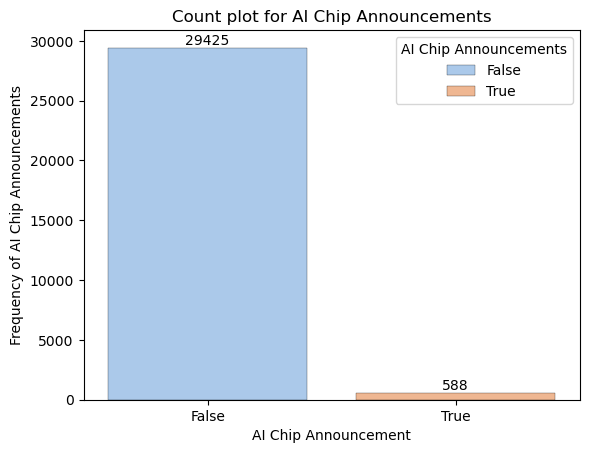

In [21]:
# Creating figure and axes to plot the graph
fig, ax = plt.subplots()

# Plotting Count plot
bars = sns.countplot(x = 'AI_Chip_Announcement', hue = 'AI_Chip_Announcement', data = df_Nvidia_Valuation_data, palette = 'pastel', edgecolor = 'black', linewidth = 0.2)

# Setting the location for the legend
ax.legend(title = "AI Chip Announcements", loc = "upper right")

# Setting x axis' name
ax.set_xlabel("AI Chip Announcement")

# Setting y axis' name
ax.set_ylabel("Frequency of AI Chip Announcements")

# Setting title
ax.set_title("Count plot for AI Chip Announcements")

# Setting values on the bar
for container in bars.containers:
    ax.bar_label(container)

# Displaying the plot
plt.show()

**Interpretation**

From this graph we can see that for most of the records there were no **Major** AI Chip Announcements, and for only **588** records there were some annoucements.

### 2) Graphs for Numerical variables

#### 1. Histrogram for **Stock_Price_USD** column

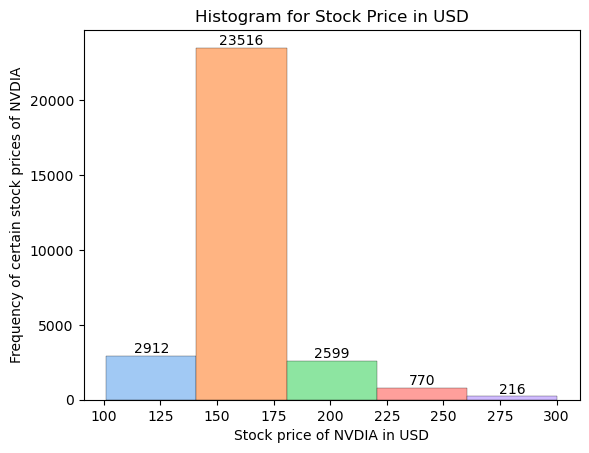

In [22]:
# setting the figure and axes for the graph
fig, ax = plt.subplots()

# Splitting the palette in the same amount of numbers bins
cm = sns.color_palette("pastel",5)

# Plotting the graph
bars = sns.histplot(x = 'Stock_Price_USD', data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# Setting color for the graph
for bin,i in zip(bars.patches,cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Stock price of NVDIA in USD")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain stock prices of NVDIA")

# Setting the title
ax.set_title("Histogram for Stock Price in USD")

# Putting values on the bars
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for most of the records the **Stock prices** of **NVIDIA** ranges between **140** to **180** USD.
- And then there are less times when it has gone less than **140** USD and more than **180** USD.
- From this we can say that NVIDIA's Stock generally is stable, and fluctuates betweeen a steady price range.

#### 2. Histrogram for **Market_Cap_Trillion_USD** column

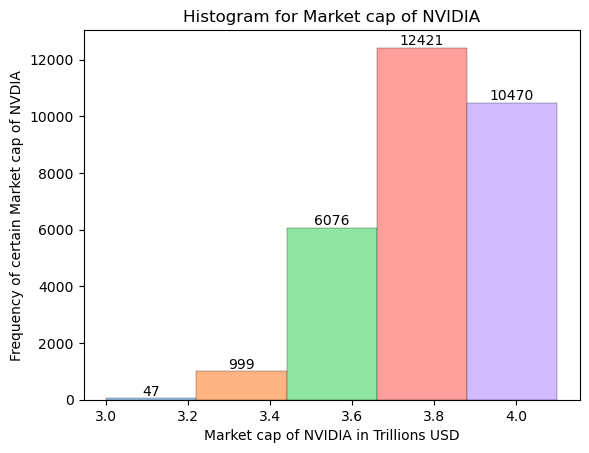

In [23]:
# setting the figure and axes for the graph
fig, ax = plt.subplots()

# Splitting colors into number of bins
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = 'Market_Cap_Trillion_USD', data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# Filling bars with colors
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Market cap of NVIDIA in Trillions USD")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Market cap of NVDIA")

# Setting the title
ax.set_title("Histogram for Market cap of NVIDIA")

# Putting values on the bars
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for most of the records **Market cap** of NVIDIA ranges between **3.6** to **4.1** Trillion USD.
- And for rest of the records it lies between **3.0** to **3.6** Trillion USD.

#### 3. Histrogram for **Trading_Volume_Million_Shares** column

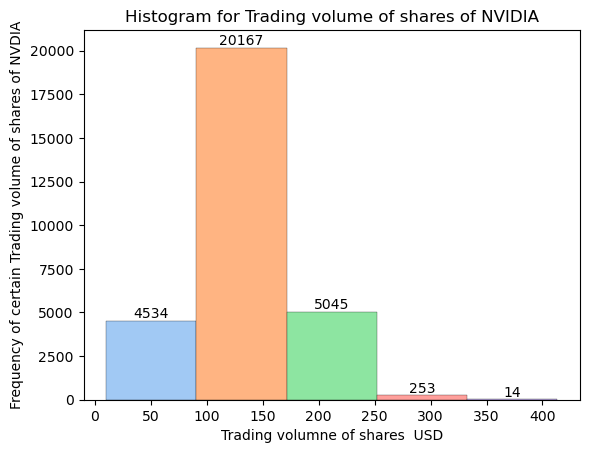

In [24]:
# setting the figure and axes for the graph
fig, ax = plt.subplots()

# Splitting color into number of bins
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = 'Trading_Volume_Million_Shares', data = df_Nvidia_Valuation_data, bins = 5, palette = 'pastel', edgecolor = 'black', linewidth = 0.2)

# Filling color in bar of the graph
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Trading volumne of shares  USD")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Trading volume of shares of NVDIA")

# Setting the title
ax.set_title("Histogram for Trading volume of shares of NVIDIA")

# Putting values on the bars
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

We can see here that for most of the records **Trading volume** generally ranges between **90** to **171** Million USD.

#### 4. Histrogram for **Sentiment_Score** column

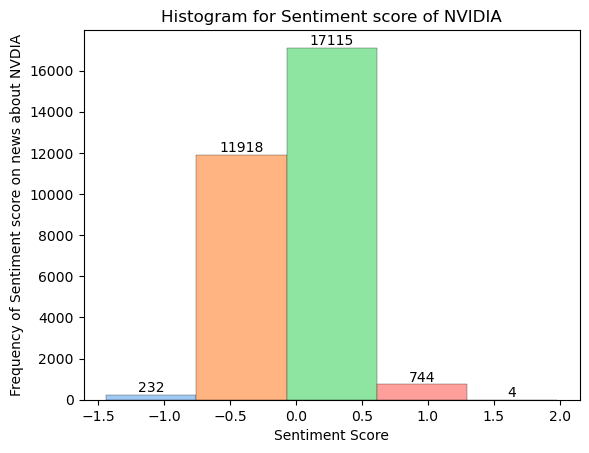

In [25]:
# setting the figure and axes for the graph
fig, ax = plt.subplots()

# Splitting color into number of bins
cm = sns.color_palette("pastel", 5)

# Plotting the graph
bars = sns.histplot(x = 'Sentiment_Score', data = df_Nvidia_Valuation_data, bins = 5, palette = 'pastel', edgecolor = 'black', linewidth = 0.2)

# Filling color in bar of the graph
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Sentiment Score")

# Setting the name of y axis
ax.set_ylabel("Frequency of Sentiment score on news about NVDIA")

# Setting the title
ax.set_title("Histogram for Sentiment score of NVIDIA")

# Putting values on the bars
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that Sentiment score for most of the records is between **-0.07** to **0.61**.
- This Indicates that for most of the records NVIDIA news has positive **Sentiment Score**

#### 5. Histrogram for **Competitor_Stock_Price_USD** column

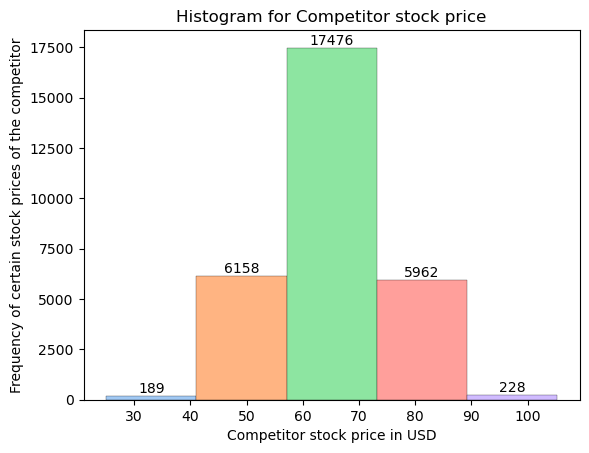

In [26]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Competitor_Stock_Price_USD", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Competitor stock price in USD")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain stock prices of the competitor")

# Setting the title of the graph
ax.set_title("Histogram for Competitor stock price")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see that for most of the records the **competitors'** stock prices ranges between **57.1** to **73.1**.
- This gives us a important insight that **NVDIA's** stock price is generally very high form it's competitors, cause we saw in the above graph NVDIA's stock price generally ranges between **140** to **180** USD.
- This tells us that NVDIA is far ahead in **Investor confidence** and **Ability to raise capital** than it's competitors.

#### 6. Histrogram for **P_E_Ratio** column

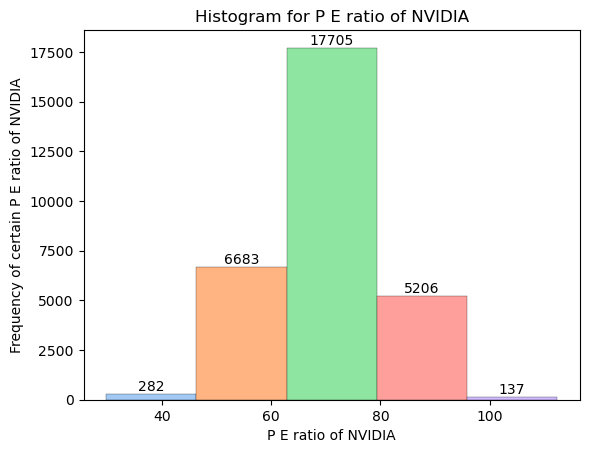

In [27]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "P_E_Ratio", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("P E ratio of NVIDIA")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain P E ratio of NVIDIA")

# Setting the title of the graph
ax.set_title("Histogram for P E ratio of NVIDIA")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for most of the records **P E ratio** of NVIDIA revolves between **62.8** to **79.3**.
- Which tells that NVIDIA maintains a good **P E ratio** for most of the records.

#### 7. Histrogram for **Analyst_Rating** column

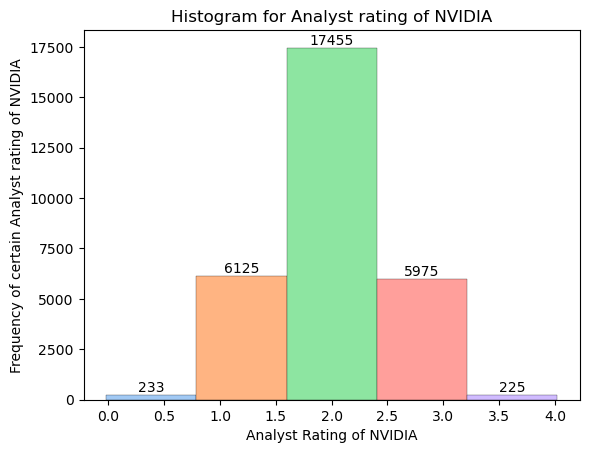

In [28]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Analyst_Rating", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Analyst Rating of NVIDIA")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Analyst rating of NVIDIA")

# Setting the title of the graph
ax.set_title("Histogram for Analyst rating of NVIDIA")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that **Analyst rating** for NVIDIA stock has generally ranged between **1.59** to **2.40**.
- This means that the rating suggests that NVDIA stock has been performing moderately meaning it is stable and it does not suggest either **strong buy** or **strong sell**.

#### 8. Histrogram for **Social_Media_Volume** column

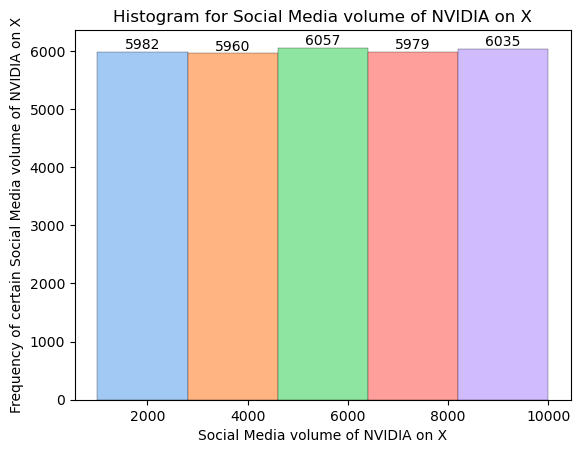

In [29]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Social_Media_Volume", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Social Media volume of NVIDIA on X")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Social Media volume of NVIDIA on X")

# Setting the title of the graph
ax.set_title("Histogram for Social Media volume of NVIDIA on X")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

We can see here that the number of social media posts regarding NVIDIA or AI Chips has been equally distributed through out the dataset.

#### 9. Histrogram for **News_Sentiment_Score** column

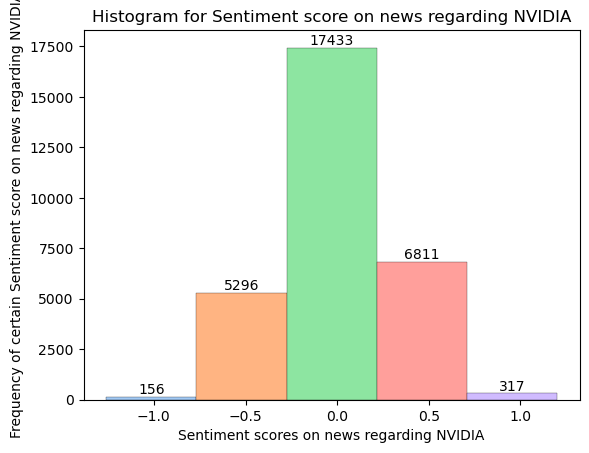

In [30]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "News_Sentiment_Score", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Sentiment scores on news regarding NVIDIA")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Sentiment score on news regarding NVIDIA")

# Setting the title of the graph
ax.set_title("Histogram for Sentiment score on news regarding NVIDIA")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for most of the records the **Sentiment score** on NVIDIA news ranges between **-0.27** to **0.21**.
- This tells us that the sentiments are generally neutral on NVIDIA news for most of the records.

#### 10. Histrogram for **Competitor_Market_Cap_Billion_USD** column

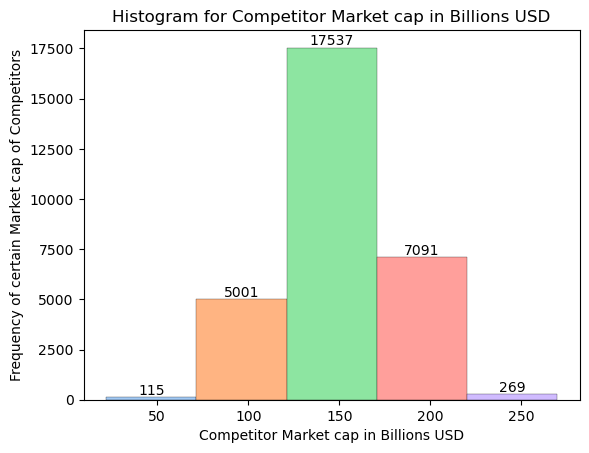

In [31]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Competitor_Market_Cap_Billion_USD", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Competitor Market cap in Billions USD")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Market cap of Competitors")

# Setting the title of the graph
ax.set_title("Histogram for Competitor Market cap in Billions USD")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we can see that the **average Market cap** of **competitors** of NVIDIA has generally ranged between **121** to **170.5** Billions USD.
- The highest average Market cap of these competitors is also in billions only i.e. **269.6** Billions, which is far more less than NVIDIA's average market cap.

#### 11. Histrogram for **Semiconductor_Index** column

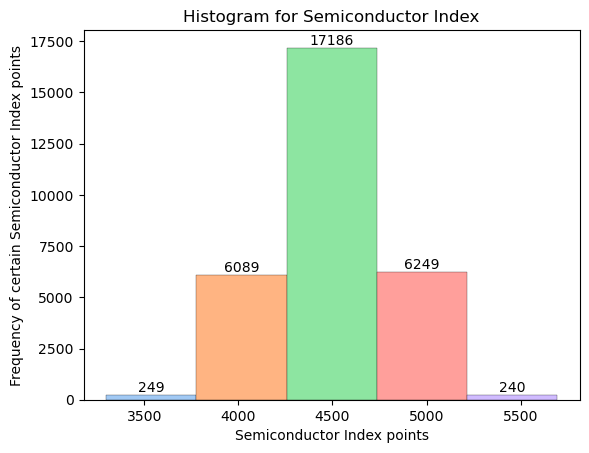

In [32]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Semiconductor_Index", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Semiconductor Index points")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Semiconductor Index points")

# Setting the title of the graph
ax.set_title("Histogram for Semiconductor Index")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for most of the records **Semiconductor Index** ranges between **4256** to **4735** points.
- Which tells us that the whole market has good Index points through out the dataset.

#### 12. Histrogram for **Tech_Sector_Sentiment** column

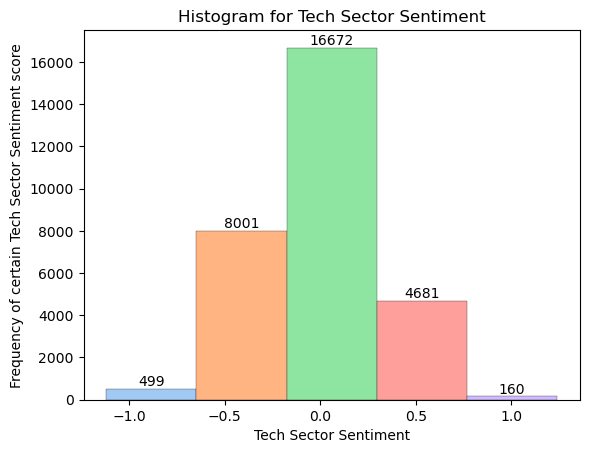

In [33]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Tech_Sector_Sentiment", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Tech Sector Sentiment")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Tech Sector Sentiment score")

# Setting the title of the graph
ax.set_title("Histogram for Tech Sector Sentiment")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see that for most of the records the **Tech sector sentiment** lies between **-0.17** to **0.29**.
- This helps us understand that for most of the records Market sentiment for **Tech sector** is neutral.

#### 13. Histrogram for **Interest_Rate_Percent** column

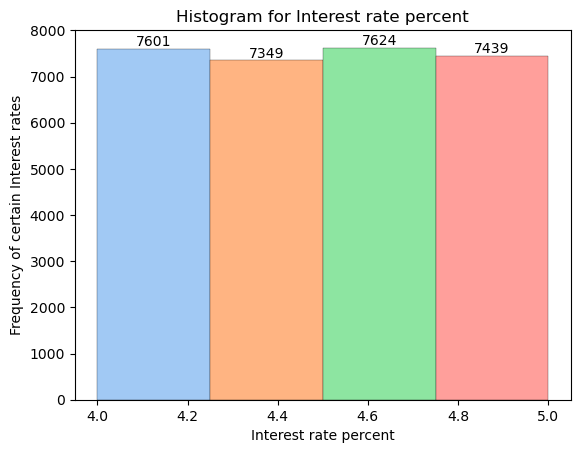

In [34]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 4)

# Plotting the graph
bars = sns.histplot(x = "Interest_Rate_Percent", data = df_Nvidia_Valuation_data, bins = 4, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Interest rate percent")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Interest rates")

# Setting the title of the graph
ax.set_title("Histogram for Interest rate percent")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**
- We can see that the range of US federal reserve Interest rate ranges between **4.0** to **5.0**, and we have equal number of records for all the possible Interest rate percent ranges.

#### 14. Histrogram for **Market_Volatility_Index** column

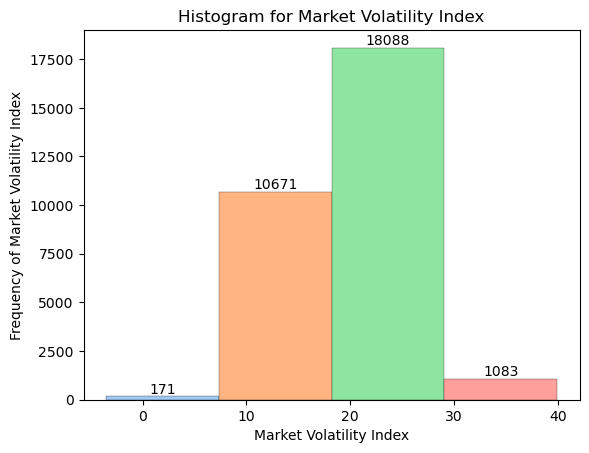

In [35]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 4)

# Plotting the graph
bars = sns.histplot(x = "Market_Volatility_Index", data = df_Nvidia_Valuation_data, bins = 4, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Market Volatility Index")

# Setting the name of y axis
ax.set_ylabel("Frequency of Market Volatility Index")

# Setting the title of the graph
ax.set_title("Histogram for Market Volatility Index")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can say that the market volatility index for most of the records lies between **18.2** to **29.04** points.
- Which says that for most of the records the Market volatility index has good high points.

#### 15. Histrogram for **Nvidia_News_Volume** column

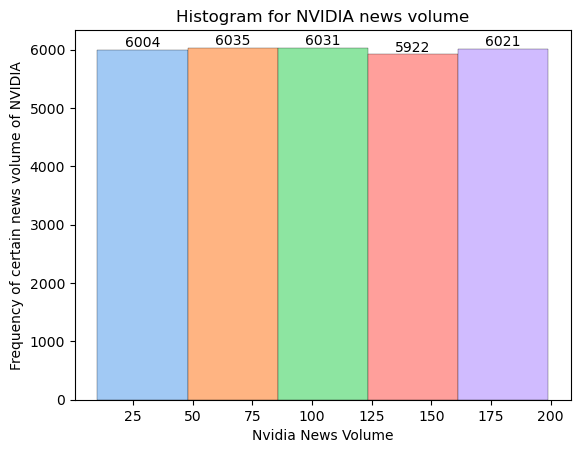

In [36]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Nvidia_News_Volume", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Nvidia News Volume")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain news volume of NVIDIA")

# Setting the title of the graph
ax.set_title("Histogram for NVIDIA news volume")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- Here we can see that we have records for all the kind of news volumes.

#### 16. Histrogram for **Regulatory_Impact_Score** column

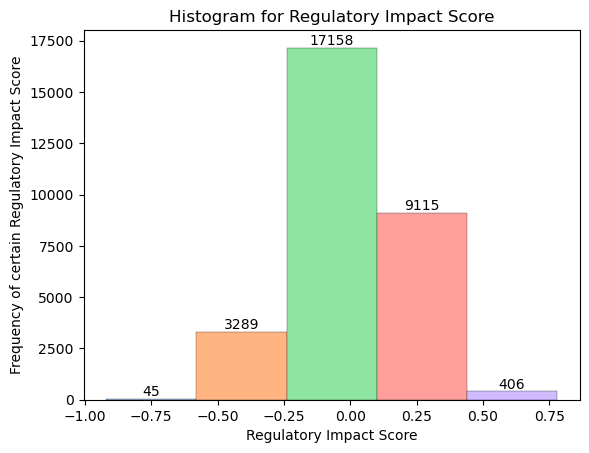

In [37]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Regulatory_Impact_Score", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Regulatory Impact Score")

# Setting the name of y axis
ax.set_ylabel("Frequency of certain Regulatory Impact Score")

# Setting the title of the graph
ax.set_title("Histogram for Regulatory Impact Score")

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

- We can see that for most of the records **Regulatory news** has neutral impact on NVIDIA i.e. **-0.24** to **0.09**.
- Which says that for most of the records we have they are about neutral impact on NVIDIA caused by Regulatory news.

### 3) Graphs for DateTime variable

#### 1. Histrogram for **Date** column

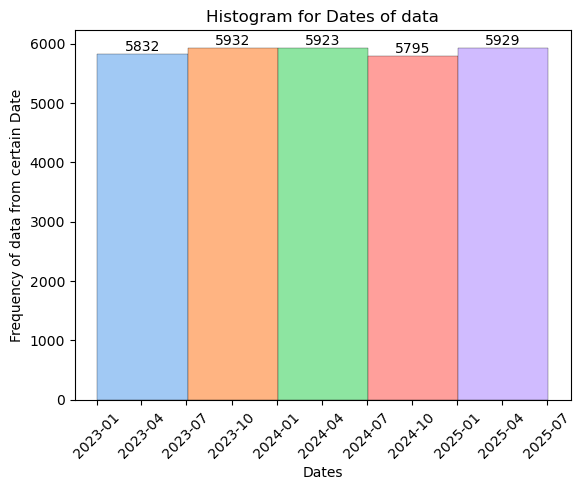

In [38]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Setting colors for each bar of the graph
cm = sns.color_palette('pastel', 5)

# Plotting the graph
bars = sns.histplot(x = "Date", data = df_Nvidia_Valuation_data, bins = 5, edgecolor = 'black', linewidth = 0.2)

# coloring the bars
for bin, i in zip(bars.patches, cm):
    bin.set_facecolor(i)

# Setting the name of x axis
ax.set_xlabel("Dates")

# Setting the name of y axis
ax.set_ylabel("Frequency of data from certain Date")

# Setting the title of the graph
ax.set_title("Histogram for Dates of data")

# Setting size of values on x axis
plt.xticks( fontsize = 10, rotation = 45)

# Showing the bar values
for container in bars.containers:
    ax.bar_label(container)

# Displaying the graph
plt.show()

**Interpretation**

From this we can say that we have mostly equal data from all the years, not most of the data from only one or two years.

## b) Bivariate Analysis

### 1. Numerical, Numerical column pair

In [39]:
# Making the correlation matrix to fetch out the pair of Numerical columns for performing Bivariate Analysis
correlation = df_Nvidia_Valuation_data.select_dtypes(include = np.number).corr()

# Printing the correlation table
correlation

,Stock_Price_USD,Market_Cap_Trillion_USD,Trading_Volume_Million_Shares,Sentiment_Score,Competitor_Stock_Price_USD,P_E_Ratio,Analyst_Rating,Social_Media_Volume,News_Sentiment_Score,Competitor_Market_Cap_Billion_USD,Semiconductor_Index,Tech_Sector_Sentiment,Interest_Rate_Percent,Market_Volatility_Index,Nvidia_News_Volume,Regulatory_Impact_Score
Stock_Price_USD,1.000000,0.009290,-0.004905,0.006548,-0.014485,0.007105,-0.003002,-0.002335,-0.002281,-0.007475,-0.002942,0.000783,0.009422,-0.000018,0.003788,0.002659
Market_Cap_Trillion_USD,0.009290,1.000000,0.008371,0.004464,0.000434,-0.004469,-0.001971,0.000450,-0.003221,0.005593,0.006210,-0.002045,0.003263,-0.001785,0.006967,-0.001678
Trading_Volume_Million_Shares,-0.004905,0.008371,1.000000,-0.004743,0.006946,-0.007002,0.007873,-0.005743,-0.001597,0.006813,0.005655,-0.005387,0.009152,-0.010025,0.003480,0.003909
Sentiment_Score,0.006548,0.004464,-0.004743,1.000000,0.001956,-0.003043,0.001559,-0.007786,-0.000261,-0.001401,-0.000684,-0.002808,0.004543,0.004819,0.006560,0.001751
Competitor_Stock_Price_USD,-0.014485,0.000434,0.006946,0.001956,1.000000,-0.012838,-0.000456,0.009022,0.010895,-0.007021,-0.004932,-0.000553,-0.003989,-0.008606,0.003142,0.007637
P_E_Ratio,0.007105,-0.004469,-0.007002,-0.003043,-0.012838,1.000000,-0.009561,-0.003572,0.002012,0.003801,0.005964,0.004497,-0.001499,-0.003141,-0.003946,0.002024
Analyst_Rating,-0.003002,-0.001971,0.007873,0.001559,-0.000456,-0.009561,1.000000,-0.001432,0.001941,0.002925,-0.010759,-0.008055,-0.000755,0.001852,0.013822,0.000186
Social_Media_Volume,-0.002335,0.000450,-0.005743,-0.007786,0.009022,-0.003572,-0.001432,1.000000,0.001109,0.006379,0.005065,0.004937,-0.007630,-0.006155,0.004176,-0.010045
News_Sentiment_Score,-0.002281,-0.003221,-0.001597,-0.000261,0.010895,0.002012,0.001941,0.001109,1.000000,0.007937,-0.000417,0.001560,0.005313,0.001589,0.001805,0.000015
Competitor_Market_Cap_Billion_USD,-0.007475,0.005593,0.006813,-0.001401,-0.007021,0.003801,0.002925,0.006379,0.007937,1.000000,0.000322,-0.006246,-0.007799,0.001075,0.002498,0.004724


**Interpretation**

We can see that it is a bit time consuming to find strong correlated columns here in correlation table. So let's build a Correlation heatmap

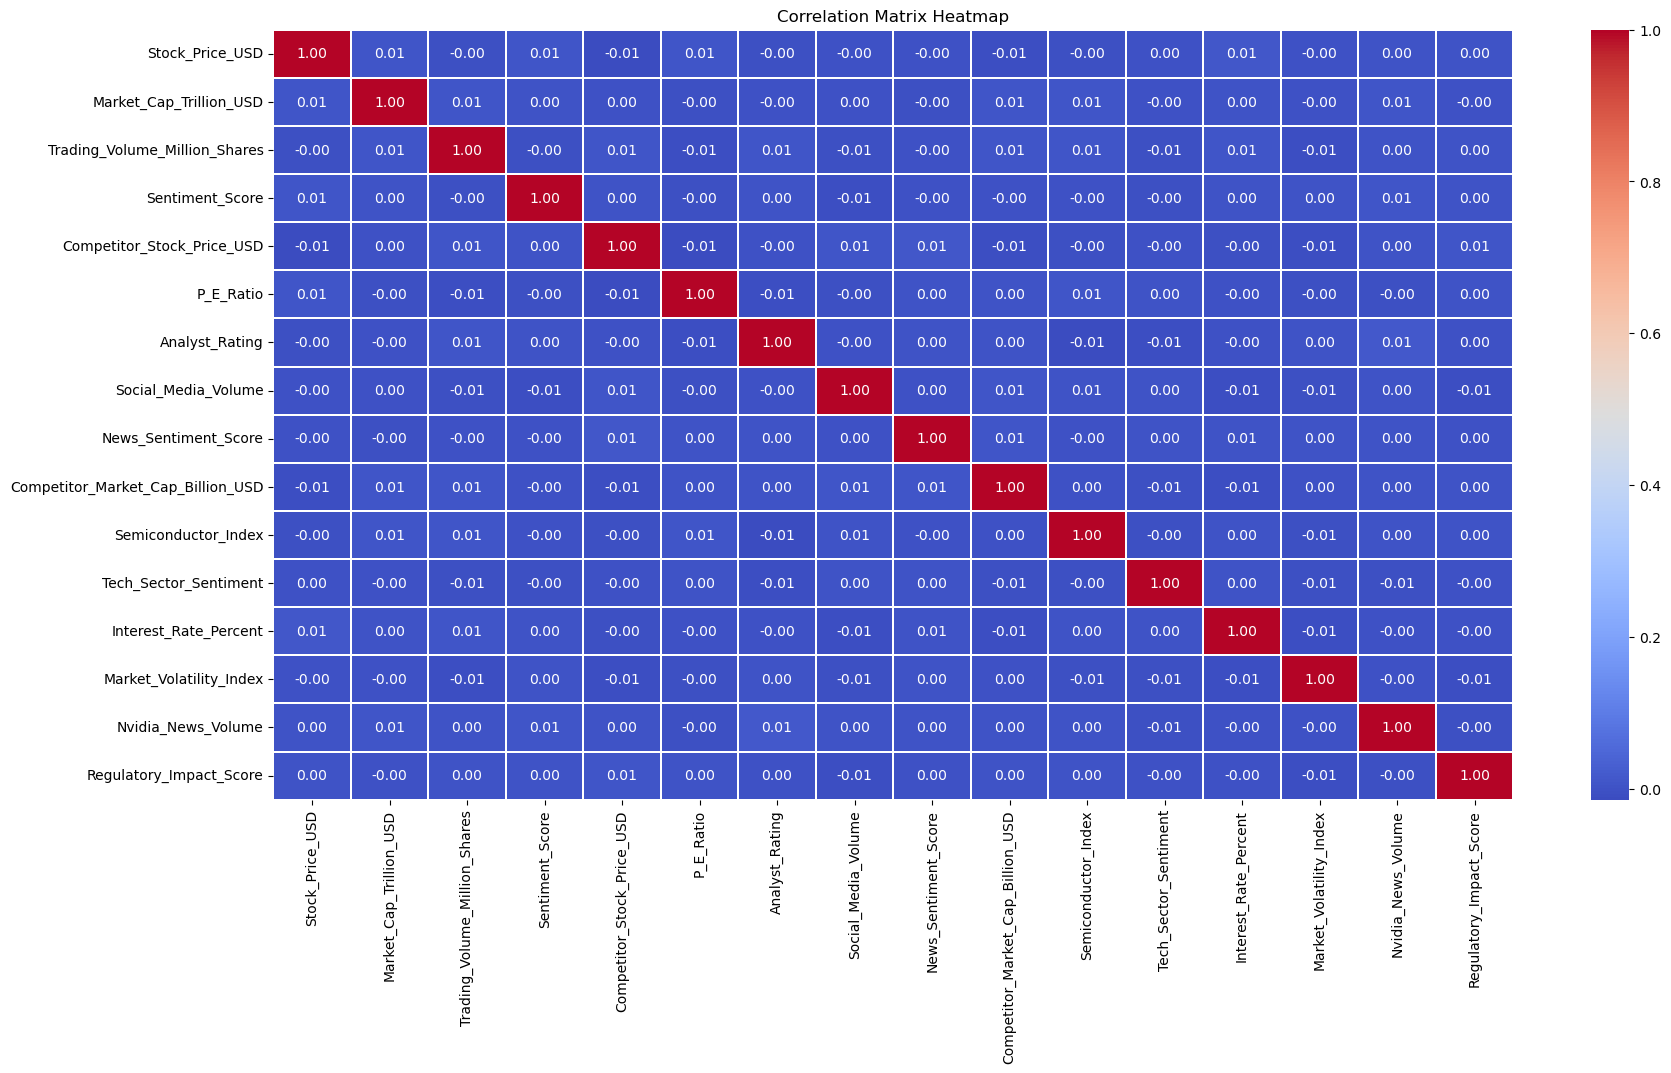

In [40]:
# Setting the figure
plt.figure(figsize = (20,10))

# Plotting the heatmap
sns.heatmap(correlation, annot = True, cmap = "coolwarm", fmt = '.2f', linewidth = 0.01)

# Setting the title of the plot
plt.title("Correlation Matrix Heatmap")

# Displaying the graph
plt.show()

**Interpretation**

It is visible that there is no strong correlated column pairs are available here between these numerical columns. So we can say that there can be no Bivariate analysis be done on Numerical Numerical pair in this dataset.

### 2. Categorical, Categorical column pairs

Here as we have only one categorical column, so we cannot do categorical categorical pair bivariate analysis.

### 3. Numerical, categorical column pairs

To perform bivariate analysis on Numerical Categorical pair we first should select the pairs, to select the pairs we have to run ANOVA test on these Numerical and Categorical pairs to select the pairs.

In [41]:
# Running a for loop to run ANOVA test on Numerical Categorical column pairs
for num_col in df_Nvidia_Valuation_data.select_dtypes(include = 'float64'):
    groups = [group[num_col].values for announcement, group in df_Nvidia_Valuation_data.groupby('AI_Chip_Announcement')]

    # ANOVA test
    f_stat, p_value = stats.f_oneway(*groups)
    if p_value > 0.05:
        print(f"column pair {num_col} and 'AI_Chip_Announcement' are not dependent because {p_value} > 0.05")
        print()
    elif p_value <= 0.05:
        print(f"column pair {num_col} and 'AI_Chip_Announcement' are dependent because {p_value} <= 0.05")
        print()

column pair Stock_Price_USD and 'AI_Chip_Announcement' are not dependent because 0.4582951441693085 > 0.05

column pair Market_Cap_Trillion_USD and 'AI_Chip_Announcement' are not dependent because 0.5520406868667849 > 0.05

column pair Trading_Volume_Million_Shares and 'AI_Chip_Announcement' are not dependent because 0.4032024482921531 > 0.05

column pair Sentiment_Score and 'AI_Chip_Announcement' are not dependent because 0.16154803694804518 > 0.05

column pair Competitor_Stock_Price_USD and 'AI_Chip_Announcement' are not dependent because 0.6758879175128444 > 0.05

column pair P_E_Ratio and 'AI_Chip_Announcement' are not dependent because 0.1226894491853296 > 0.05

column pair Analyst_Rating and 'AI_Chip_Announcement' are not dependent because 0.6681667122894194 > 0.05

column pair Social_Media_Volume and 'AI_Chip_Announcement' are not dependent because 0.24577269620213146 > 0.05

column pair News_Sentiment_Score and 'AI_Chip_Announcement' are not dependent because 0.1610988694715014

**Interpretation**

We can see here that no Numerical Categorical column pairs are also dependent.

### 4. Numerical, datetime column pairs

Here we will directly select the pairs with logic and sense

#### 1. LinePlot for **Date** and **Stock_Price_USD** column

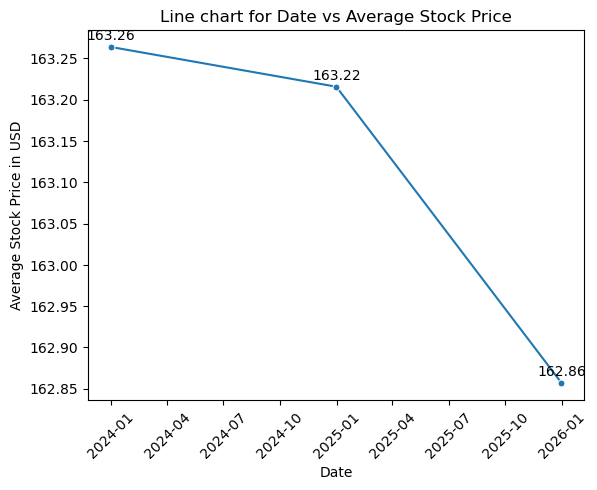

In [42]:
# Setting the figure and axes
fig, ax = plt.subplots()

# Sorting out the data for the line plot
sorted_data = df_Nvidia_Valuation_data.resample('Y', on = 'Date')['Stock_Price_USD'].mean().reset_index()

# Plotting the graph
sns.lineplot(x = 'Date', y = 'Stock_Price_USD', data = sorted_data, marker = 'o', markersize = 5)

for i in range(len(sorted_data)):
    plt.annotate(
        f"{sorted_data['Stock_Price_USD'][i]:.2f}",  # Format with 2 decimal places
        (sorted_data['Date'][i], sorted_data['Stock_Price_USD'][i]),
        textcoords="offset points",
        xytext=(0, 5),  # Offset text 5 pixels above the point
        ha='center',
        fontsize=10,
    )

# Setting the name of x axis
ax.set_xlabel("Date")

# Setting the name of y axis
ax.set_ylabel("Average Stock Price in USD")

# Setting the title of the graph
ax.set_title("Line chart for Date vs Average Stock Price")

# Setting the size and style of values on x and y axis
plt.xticks(rotation = 45)

# Displaying the graph
plt.show()

**Interpretation**

We can see here that the **Average stock price** of NVIDIA over the years has reduced, which conveys reduced investor confidence in the stock and company.

#### 2. LinePlot for **Date** and **Market_Cap_Trillion_USD** column

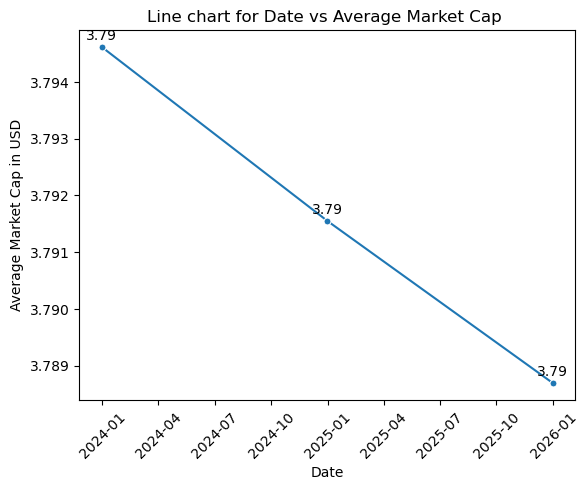

In [43]:
# Setting the figure and axes
fig, ax = plt.subplots()

# Sorting out the data for the line plot
sorted_data = df_Nvidia_Valuation_data.resample('Y', on = 'Date')['Market_Cap_Trillion_USD'].mean().reset_index()

# Plotting the graph
sns.lineplot(x = 'Date', y = 'Market_Cap_Trillion_USD', data = sorted_data, marker = 'o', markersize = 5)

for i in range(len(sorted_data)):
    plt.annotate(
        f"{sorted_data['Market_Cap_Trillion_USD'][i]:.2f}",  # Format with 2 decimal places
        (sorted_data['Date'][i], sorted_data['Market_Cap_Trillion_USD'][i]),
        textcoords="offset points",
        xytext=(0, 5),  # Offset text 5 pixels above the point
        ha='center',
        fontsize=10,
    )

# Setting the name of x axis
ax.set_xlabel("Date")

# Setting the name of y axis
ax.set_ylabel("Average Market Cap in USD")

# Setting the title of the graph
ax.set_title("Line chart for Date vs Average Market Cap ")

# Setting the size and style of values on x and y axis
plt.xticks(rotation = 45)

# Displaying the graph
plt.show()

**Interpretation**

We can see that average market cap has also reduced over the years, though not significantly but still has reduced.

## c) Multivariate Analysis

**Interpretation**

The chosen Dataset does not consist of another categorical column apart from **`AI_Chip_Announcement`** column. So as we know we can't do Mulitvariate analysis when we have only one categorical column and thus we can't do multivariate analysis on this dataset.